# EDE parameter space mapping



### Recall for the EDE runs in CLASS we set $\Omega_\Lambda=0$ and instead include this in the potential of the axion scalar field

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import math


matplotlib.rcParams['axes.linewidth'] = 10
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.labelsize'] = 125
matplotlib.rcParams['xtick.labelsize'] = 65 
matplotlib.rcParams['ytick.labelsize'] = 65
matplotlib.rcParams['legend.fontsize'] = 100
matplotlib.rcParams['axes.labelpad'] = 60

# 1. Display best fit EDE model compared to $\Lambda$CDM

### Set the best fit EDE settings as per Hill et al paper VI: best fit model to non-LSS data (CMB, SH0ES and distance data) recall that now we have fixed $\theta_s$ following setting the bestfit $H_0$ value and indding corresponding vlaue for $\theta_s$. Paramters from table 1 in https://arxiv.org/pdf/1908.06995.pdf

In [2]:
EDE_settings= {'100*theta_s': 1.0415117075976437,
         'log10z_c': 3.562,
         'thetai_scf': 2.83,
         'A_s': 2.215e-09,
         'n_s': 0.9889,
         'omega_b': 0.02253,
         'omega_cdm': 0.1306,
         'tau_reio': 0.072,
         'non linear':'HMCODE',
         'N_ncdm':1,
         'm_ncdm': 0.06,
         'N_ur':2.0328, 
         'Omega_Lambda':0.0, #set to zero as included in potential function! 
         'Omega_fld':0, 
         'Omega_scf':-1, 
         'n_scf':3, #n-value for potential 
         'CC_scf':1, 
         'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
         'scf_tuning_index':3, 
         'attractor_ic_scf':'no', 
         'output':'tCl pCl lCl mPk', 
         'lensing':'yes', 
         'l_max_scalars':3508, 
         'P_k_max_h/Mpc':30,
         'z_max_pk':2., 
         'fEDE':0.122,
         'z_pk':'0.7,0'}



In [3]:
LCDM_settings = {  'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   'h':0.6821,
                   'omega_b':0.02253,
                   'omega_cdm':0.1177,
                   'A_s':2.216e-9, 
                   'n_s':0.9686,
                   'tau_reio':0.085,
                   'm_ncdm': 0.06,
                   'N_ncdm':1, 
                   'N_ur':2.0328,
                   'l_max_scalars':3508,
                   'non linear':'HMcode',
                   'P_k_max_h/Mpc':100,
                   'z_max_pk':2.,
                   'z_pk':'0.7,0'}


### Setting to best fit $\Lambda$CDM values for Planck.

In [4]:
LCDM = Class()
LCDM.set(LCDM_settings)


#for computing non-linear MPS using 1-loop PT and IR resummation 
LCDM.set({'non linear':'PT',
        'IR resummation':'Yes',
        'Bias tracers':'Yes',
        'cb':'Yes',
        'RSD':'Yes',
        'AP':'Yes',
        'Omfid':'0.31'
       })


LCDM.compute()

In [5]:
EDE = Class()
EDE.set(EDE_settings)


#for computing non-linear MPS using 1-loop PT and IR resummation 
EDE.set({'non linear':'PT',
        'IR resummation':'Yes',
        'Bias tracers':'Yes',
        'cb':'Yes',
        'RSD':'Yes',
        'AP':'Yes',
        'Omfid':'0.31'
       })


EDE.compute()

In [6]:
print(EDE.h())

0.721897


### Get the temperature power spectra data for the EDE runs and LCDM

In [7]:
clLCDM=LCDM.lensed_cl()
clTTLCDM = clLCDM.get("tt")
# tcmb=2.725e6

tcmb = 1e6 #This gives a match up to Hill et al figure- not sure why they used this value! 

clell = clLCDM.get("ell") #same as the l values calculated for the EDE runs!
DellTTLCDM = tcmb**2*np.multiply(np.multiply(clell,clell+1),clTTLCDM)/(2*3.1415) #cl multiplied by l(l+1) 


clEDE = EDE.lensed_cl()
clTTEDE = clEDE.get("tt")
DellTTEDE = tcmb**2*np.multiply(np.multiply(clell,clell+1),clTTEDE)/(2*3.1415)

### Figure 1

CMB temperature anisotropy power spectra (left panel) and residuals (right panel) for $\Lambda $CDM (black, solid) and EDE (red, dashed) models, with $H_0 = 68.21$ km/s/Mpc and $H_0 = 72.19$ km/s/Mpc, respectively.

/var/folders/pb/qmsvthxs5cv4cnk3lwh2wy180000gn/T/ipykernel_29941/591766755.py:37: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(clell,(DellTTEDE - DellTTLCDM)/DellTTLCDM,c=plt.cm.Reds(0.8),lw=10.)


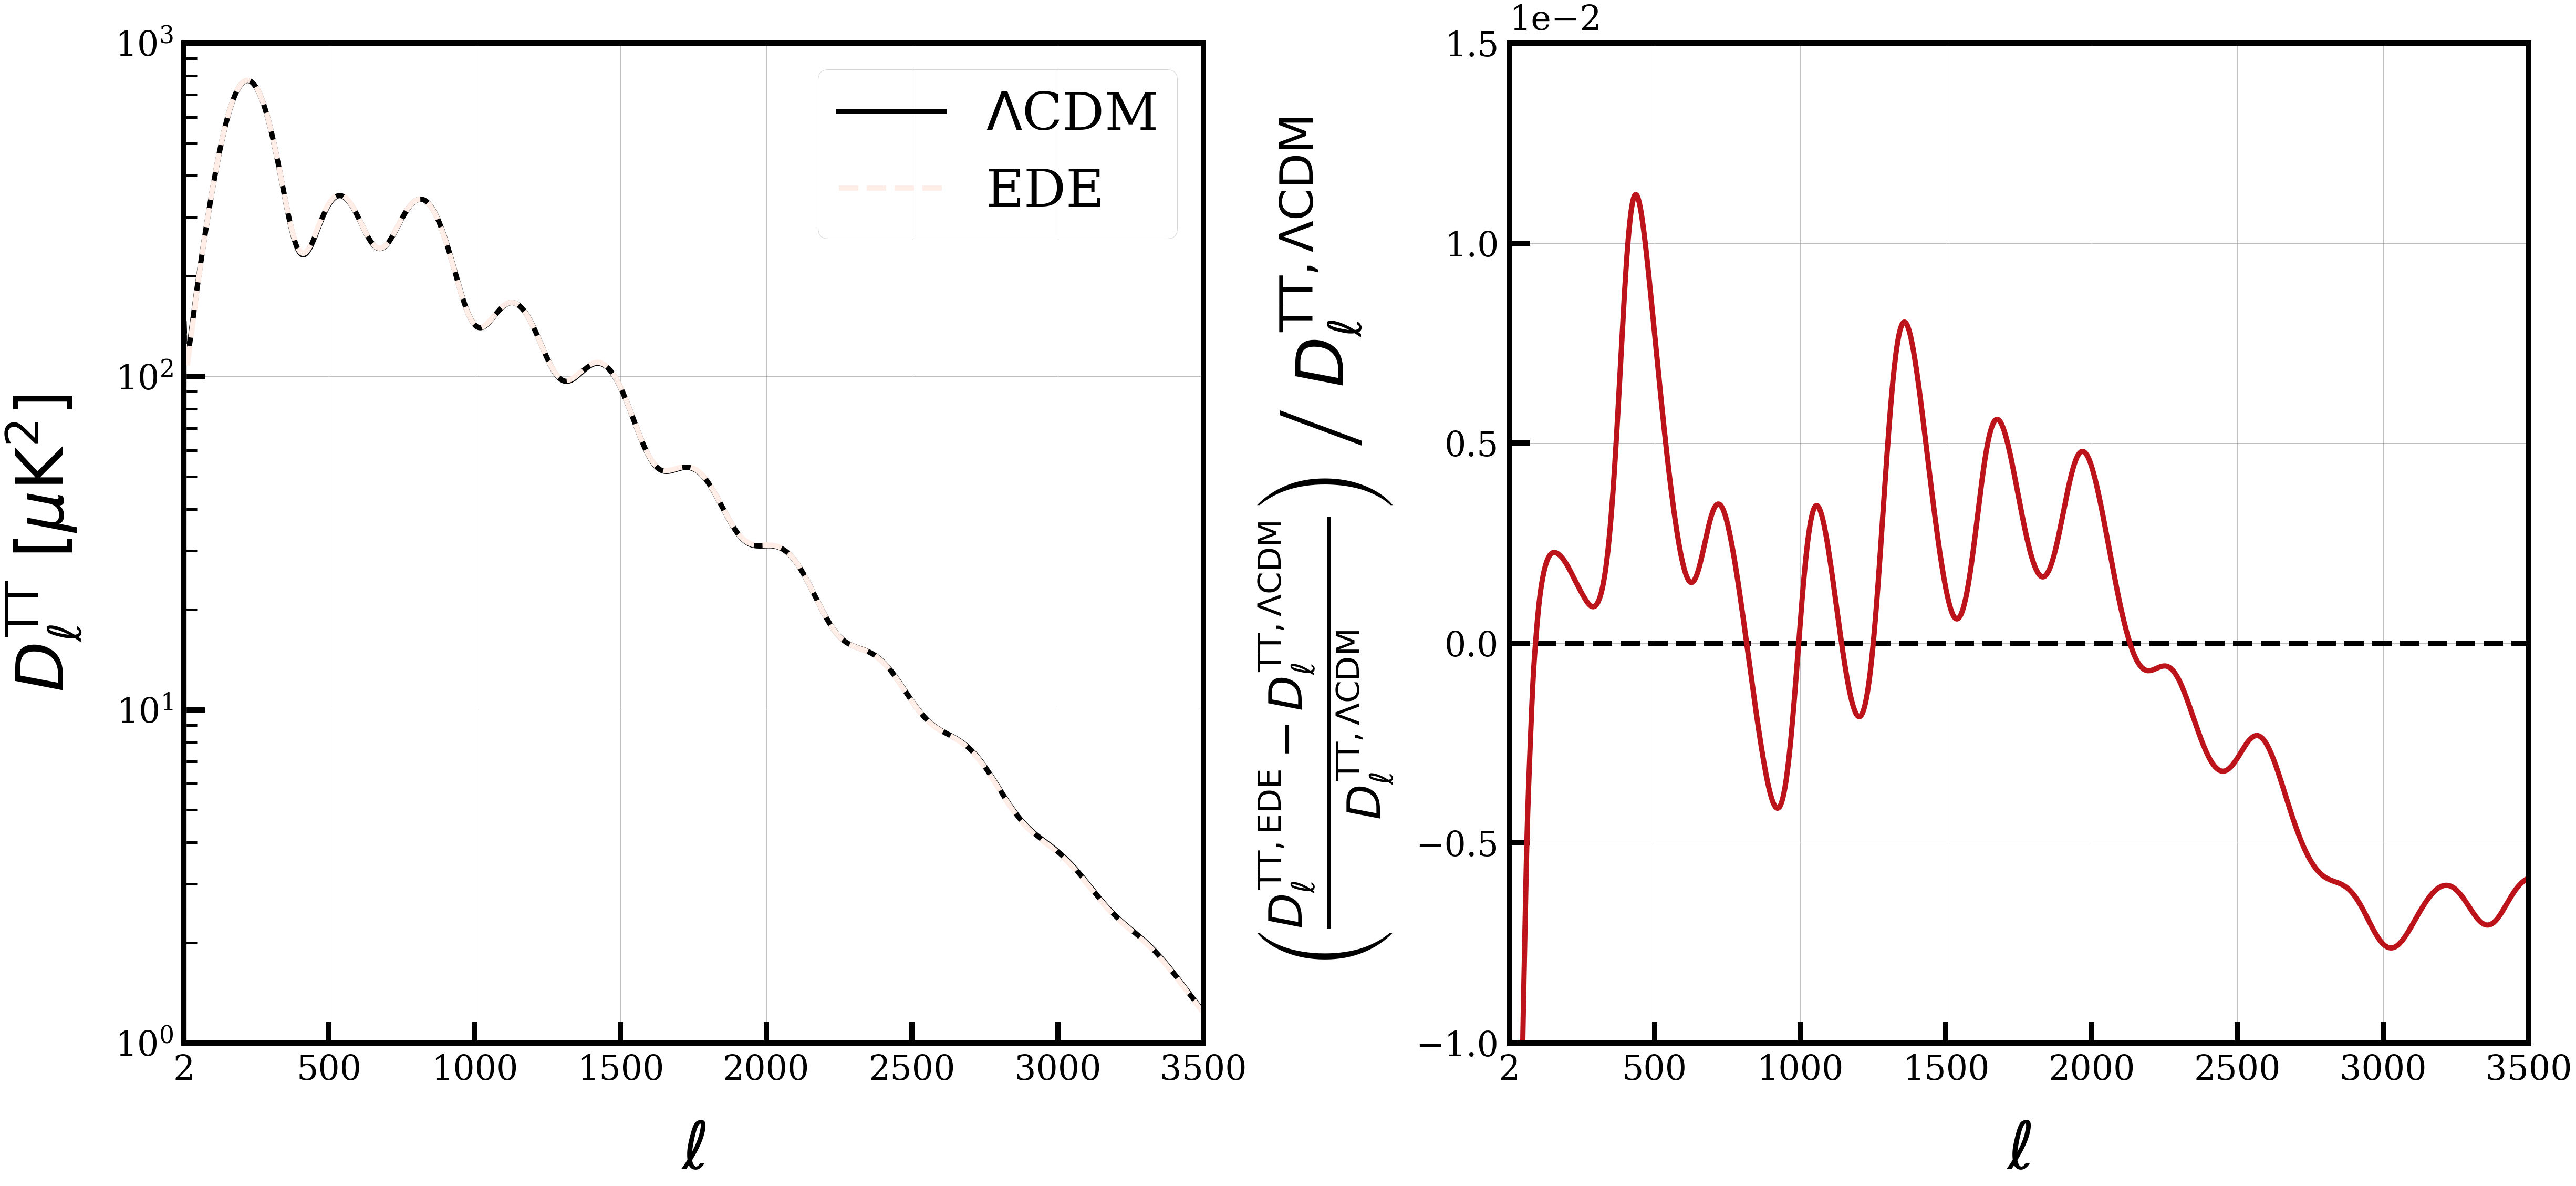

In [8]:
pos = [2,500,1000,1500,2000,2500,3000,3500]
matplotlib.axis.YAxis.OFFSETTEXTPAD = 25

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(80,35))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

ax1.grid()
ax1.plot(clell,DellTTLCDM,c='k',lw=10,label=r'$\Lambda$CDM')
ax1.plot(clell,DellTTEDE,color= plt.cm.Reds(10),ls='--',lw=10,label= 'EDE')



ax1.set_yscale('log')
ax1.set_xlim([2,3500])
ax1.set_ylim([1e0,1e3])
ax1.set_xticks(pos)
ax1.set_xticklabels(pos)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$D_\ell ^{\rm TT} ~ [\mu {\rm K}^2 ]$')
ax1.tick_params(pad=20)
ax1.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax1.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
ax1.legend()






ax2.grid()
ax2.set_xlim([2,3500])
ax2.set_ylim([-0.01,0.015])
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.axhline(0,c='k',lw=10,ls='--')
ax2.plot(clell,(DellTTEDE - DellTTLCDM)/DellTTLCDM,c=plt.cm.Reds(0.8),lw=10.)

ax2.set_xticks(pos)
ax2.set_xticklabels(pos)
ax2.set_xlabel(r'$\ell$')
ax2.set_ylabel(r'$ \left( \frac{D_\ell ^{\rm TT,EDE} - D_\ell ^{\rm TT,\Lambda CDM}}{D_\ell ^{\rm TT,\Lambda CDM}} \right) ~ \left/ ~ D_\ell ^{\rm TT,\Lambda CDM} \right.$',labelpad=40)#,fontsize=25)
ax2.tick_params(pad=20)
ax2.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax2.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='y', length=25, width=5, direction='in')


In [9]:
# Define array of k values in h/Mpc.
kk = np.logspace(-4,np.log10(0.4),1000) # k in h/Mpc (by definition). k [Mpc^-1]=k/h[ h Mpc^-1]=kk [h Mpc^-1]

hLCDM = LCDM.h()
sigma_eightlcdm = LCDM.sigma8()
hEDE = EDE.h() #same for all EDE runs
sigma_eightEDE = EDE.sigma8()


s_eightEDE = sigma_eightEDE*(EDE.Omega_m()/0.3)**0.5
s_eightlcdm = sigma_eightlcdm*(LCDM.Omega_m()/0.3)**0.5

cs = 1. # in units [Mpc/h]^2


kMpcLCDM = kk*hLCDM # k in units of Mpc in LCDM
kMpcEDE = kk*hEDE # k in units of Mpc in EDE runs

In [10]:
#Getting the matter power spectra 
        
pkzLCDM0 = np.zeros(len(kk))
pkzEDE0 = np.zeros(len(kk))
pkzDiffEDE0 = np.zeros(len(kk))

EDE.initialize_output(kMpcEDE, 0, len(kMpcEDE))   #[k,z of calculation,no. of ks]
LCDM.initialize_output(kMpcLCDM, 0, len(kMpcLCDM))


for kindex in range(len(kk)):
    pkzLCDM0[kindex] = LCDM.h()**3*LCDM.pk_mm_real(cs)[kindex]
    pkzEDE0[kindex] = hEDE**3*EDE.pk_mm_real(cs)[kindex]
    pkzDiffEDE0[kindex] = (pkzEDE0[kindex]/pkzLCDM0[kindex]) - 1.

## Figure 2 
Non-linear matter power spectrum $P(k)$ at $z=0$ for $\Lambda$CDM and EDE best fit models that fit the primary CMB, distances, and SH0ES data. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


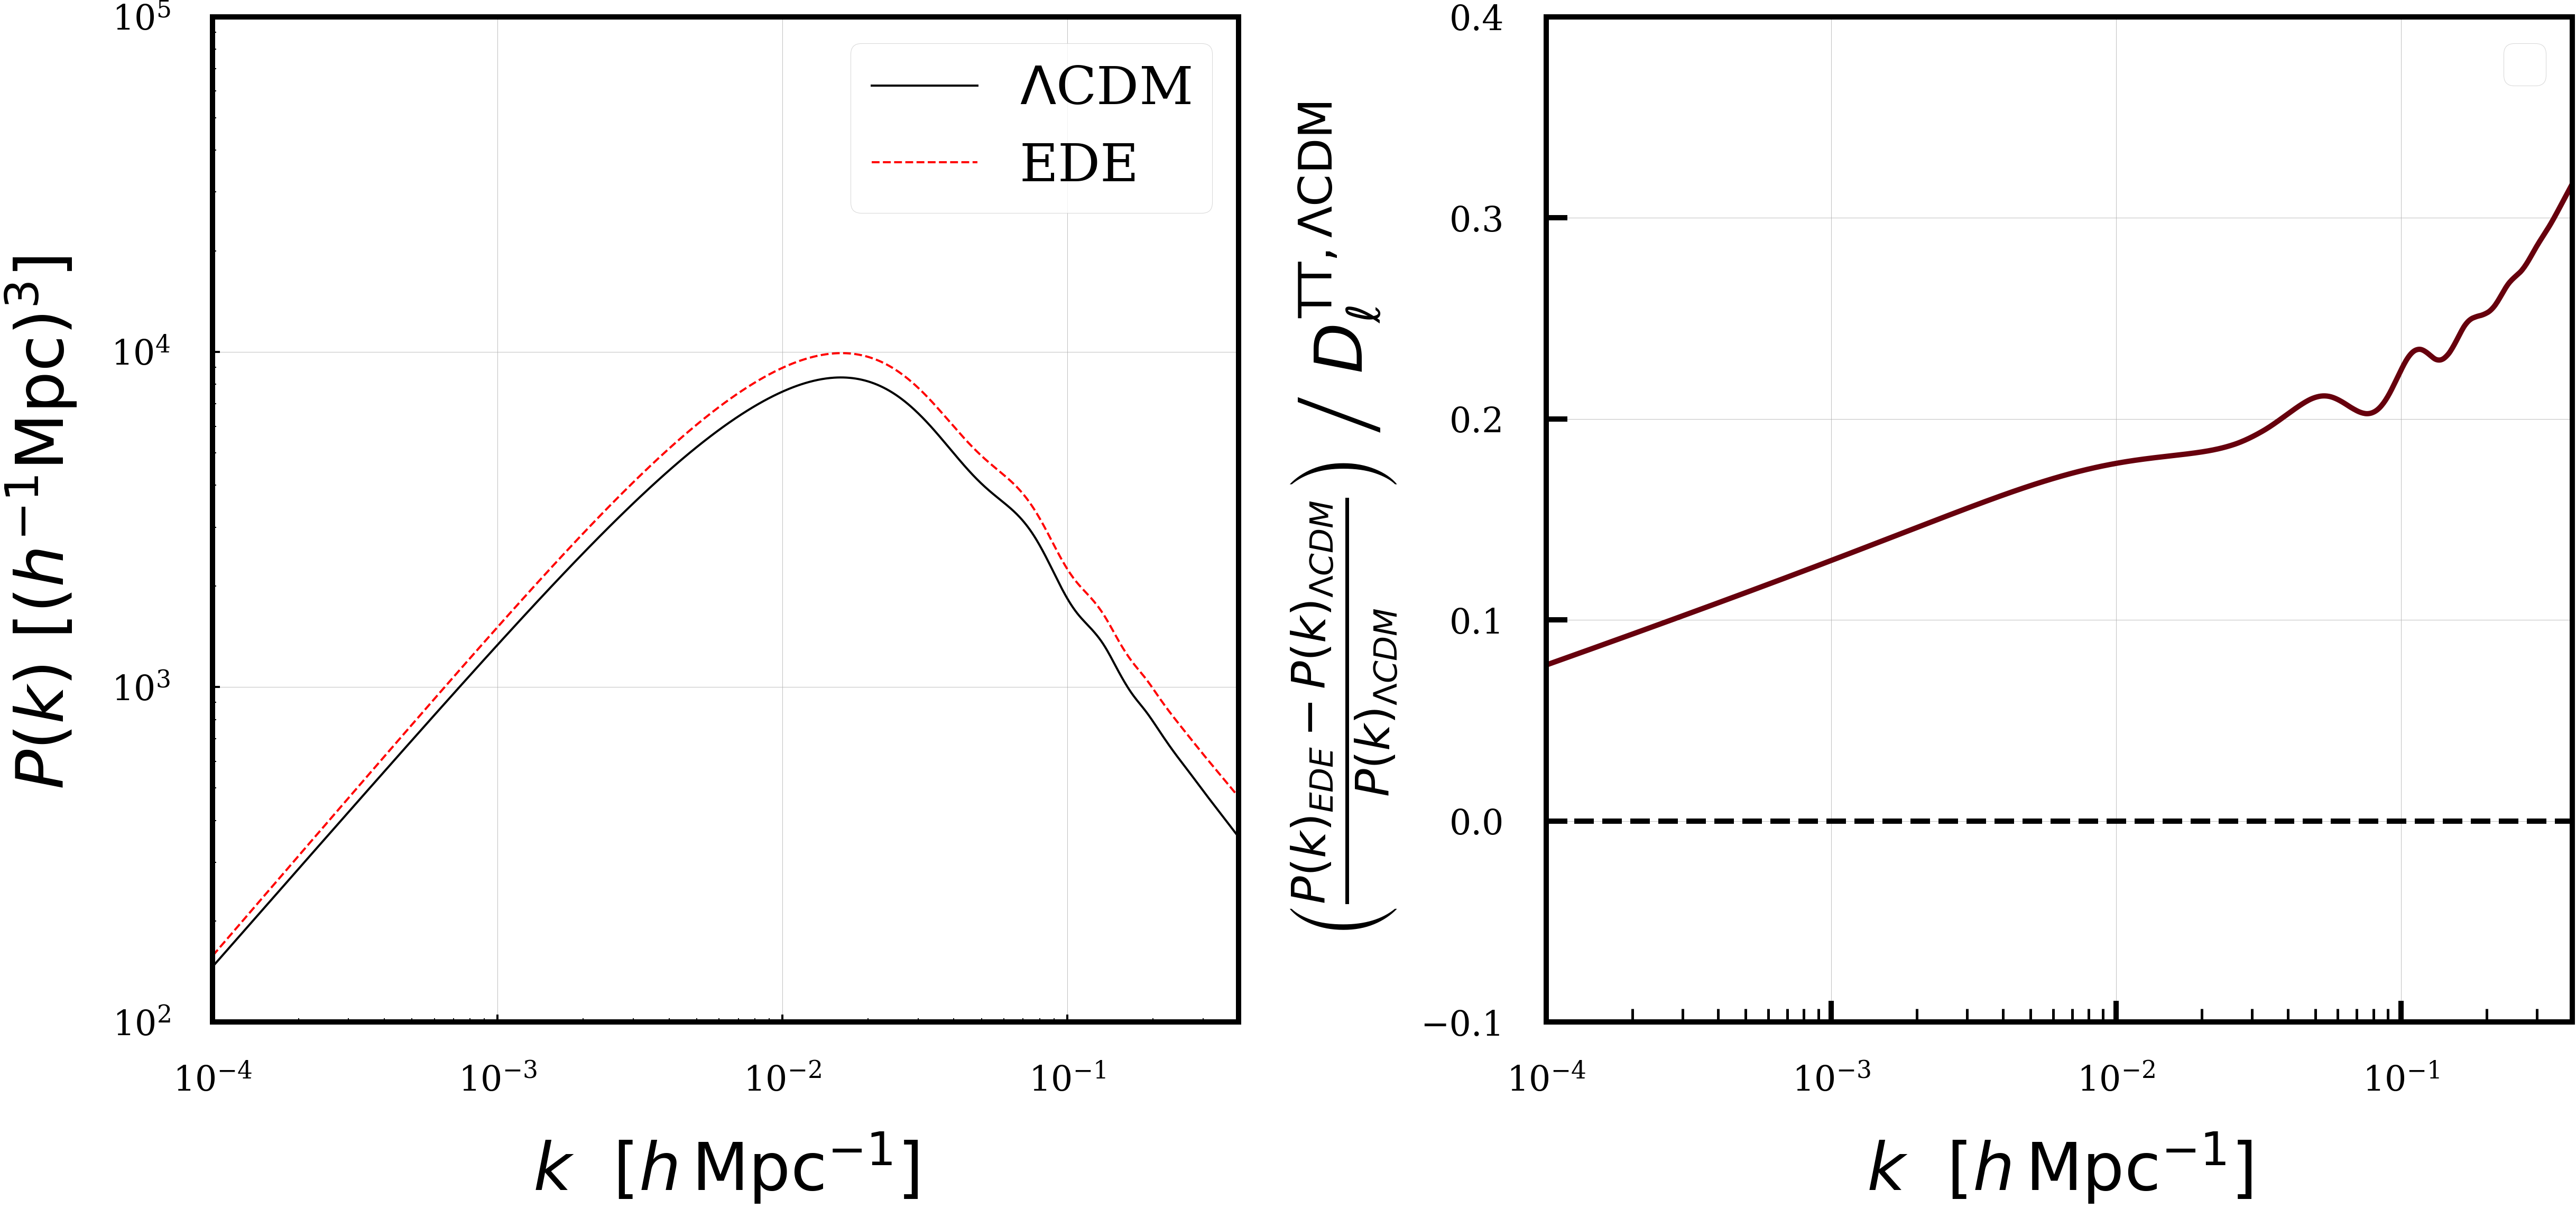

In [11]:
matplotlib.axis.YAxis.OFFSETTEXTPAD = 25
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(80,35))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)


ax1.plot(kk,pkzLCDM0,c='k',lw=4,label=r'$\Lambda$CDM')
var_color = plt.cm.Reds(1*5)
ax1.plot(kk,pkzEDE0,c='r',lw=4,ls='--',label='EDE')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.grid()
ax1.set_xlabel(r'$k$  $[h\, {\rm Mpc}^{-1}]$')
ax1.tick_params(pad=80)
ax1.tick_params(which='major',axis='x', length=14, width=4, direction='in')
ax1.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
ax1.tick_params(which='major',axis='y', length=14, width=4, direction='in')
ax1.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
ax1.legend(loc='best')

ax1.set_ylabel(r'$ P(k) ~ [ (h^{-1}{\rm Mpc})^3 ] $ ')
ax1.set_ylim([1e2,1e5])
ax1.set_xlim([kk[0],kk[-1]])

ax2.grid()
ax2.set_xlim([kk[0],kk[-1]])
ax2.set_ylim([-0.1,0.4])
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.axhline(0,c='k',lw=10,ls='--')
var_color = plt.cm.Reds(0.8*5/(4-1) + 0.2)
ax2.plot(kk,pkzDiffEDE0,c=var_color,lw=10.)
ax2.set_xlabel(r'$k$  $[h\, {\rm Mpc}^{-1}]$')
ax2.set_xscale('log')
ax2.set_ylabel(r'$ \left( \frac{P(k)_{EDE} - P(k)_{\Lambda CDM}}{P(k)_{\Lambda CDM}} \right) ~ \left/ ~ D_\ell ^{\rm TT,\Lambda CDM} \right.$',labelpad=40)#,fontsize=25)
ax2.tick_params(pad=80)
ax2.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax2.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
ax2.legend(loc='best')
fig.savefig('matterPS_just_baseline_PT',bbox_inches='tight')

# 2. Varying the neutrino mass parameter to get a better fit to LSS data whilst keeping CMB fit good 

In [12]:
############################################
#
# Varying parameter (others fixed to default)
#
var_name = 'm_ncdm'
var_array = np.array([0.1,0.2,0.3,0.4,0.5])
var_num = len(var_array)
var_legend = r'$m_\nu$'
var_figname = r'$m_\nu$'
var_labels = [r'$M_\nu$ = %.2f $\rm eV$'%item for item in var_array]
#
# Constraints to be matched
#
#
#############################################
#
# Fixed settings
omega_cdm_baseline = 0.1306  #parameters from baseline model 
omega_b_baseline = 0.02253 #parameters from baseline model
h_baseline = 0.721897 #parameters from baseline model
Omega_m = 0.295 #Parameter value for baseline model with m_nu  = 0.06, h = 0.7219 (as for the best fit EDE vals)

In [13]:
common_settings = {'100*theta_s': 1.0415117075976437,
         'log10z_c': 3.562,
         'thetai_scf': 2.83,
         'A_s': 2.215e-09,
         'n_s': 0.9889,
         'omega_b': omega_b_baseline,
         'omega_cdm': omega_cdm_baseline,
         'tau_reio': 0.072,
         'non linear':'HMCODE',
         'N_ncdm':1,
         'N_ur':2.0328, 
         'Omega_Lambda':0.0, #set to zero as included in potential function! 
         'Omega_fld':0, 
         'Omega_scf':-1, 
         'n_scf':3, #n-value for potential 
         'CC_scf':1, 
         'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
         'scf_tuning_index':3, 
         'attractor_ic_scf':'no', 
         'output':'tCl pCl lCl mPk', 
         'lensing':'yes', 
         'l_max_scalars':3508, 
         'P_k_max_h/Mpc':30,
         'z_max_pk':2., 
         'fEDE':0.122}



M = {}


for i, m_ncdm in enumerate(var_array):
    
    omega_nu_baseline = 0.06/93.14
    
    omega_nu = m_ncdm/93.14
    
    omega_nu_diff = omega_nu-omega_nu_baseline #the differnce that must be accounted for by a decrease in omega_cdm 
    
    omega_cdm = omega_cdm_baseline-omega_nu_diff

    M[i] = Class()
    M[i].set(common_settings)
    
    #If we wanted to trade off against omega_cdm we could do this here
    #In the final analysis we choose not to do this in order to keep theta_s fixed-> a dataa driven exploration of parameter space 
    
    #M[i].set({'omega_cdm': omega_cdm})
    
    
    #for computing non-linear MPS using 1-loop PT and IR resummation 
    M[i].set({'non linear':'PT',
        'IR resummation':'Yes',
        'Bias tracers':'Yes',
        'cb':'Yes',
        'RSD':'Yes',
        'AP':'Yes',
        'Omfid':'0.31'
           })

    
    M[i].set({'m_ncdm':m_ncdm})
    M[i].compute()
    hnu = M[i].h()
    
    kMpcm_nus = kk*hnu # k in units of Mpc for modified EDE runs
        
    M[i].initialize_output(kMpcm_nus, 0, len(kMpcm_nus))
    
    


In [14]:
print(M[0].Omega_m()*M[0].h()**2)
print(M[1].Omega_m()*M[1].h()**2)
print(M[2].Omega_m())
print(M[0].h())
print(M[1].h())

0.15420325684052746
0.15527694774839113
0.31763758786091034
0.7182856
0.7096349


In [15]:
#check whether Omega_m is beging kept const. 
sig_8s = []
for i, m_ncdm in enumerate(var_array):
    sigma_eightnu = M[i].sigma8()    
    sig_8s.append(sigma_eightnu)


In [16]:
#Get the temperature power spectra data for the different runs and the output H_0 and sigma8 parameters 

clEDEmod = {}
clTTEDEmod = {}
DellTTEDEmod = {}
hs = []
sigma_eights = []
s_eights = []


for i, fEDE in enumerate(var_array):
    clEDEmod[i] = M[i].lensed_cl()
    clTTEDEmod[i] = clEDEmod[i].get("tt")
    DellTTEDEmod[i] = tcmb**2*np.multiply(np.multiply(clell,clell+1),clTTEDEmod[i])/(2*3.1415)
    hs.append(M[i].h())
    sum = M[i].Omega0_m() + M[i].Omega_r() + M[i].Omega0_k()
    s_eight = M[i].sigma8()*(M[i].Omega_m()/0.3)**0.5
    s_eights.append([var_array[i],s_eight])
    sigma_eights.append([var_array[i],M[i].sigma8()])

### Plot the CMB temperature power spectra to check for consistency with $\Lambda$ CDM

/var/folders/pb/qmsvthxs5cv4cnk3lwh2wy180000gn/T/ipykernel_29941/3903971131.py:38: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(clell,(DellTTEDE - DellTTLCDM)/DellTTLCDM,c='g',lw=10., label='EDE best fit model')
/var/folders/pb/qmsvthxs5cv4cnk3lwh2wy180000gn/T/ipykernel_29941/3903971131.py:41: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(clell,(DellTTEDEmod[i] - DellTTLCDM)/DellTTLCDM,c=var_color,lw=10.,label= var_labels[i])
/var/folders/pb/qmsvthxs5cv4cnk3lwh2wy180000gn/T/ipykernel_29941/3903971131.py:41: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(clell,(DellTTEDEmod[i] - DellTTLCDM)/DellTTLCDM,c=var_color,lw=10.,label= var_labels[i])
/var/folders/pb/qmsvthxs5cv4cnk3lwh2wy180000gn/T/ipykernel_29941/3903971131.py:41: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(clell,(DellTTEDEmod[i] - DellTTLCDM)/DellTTLCDM,c=var_color,lw=10.,label= var_labels[i])
/var/folders/pb/qmsvthxs5cv4cnk3lwh2wy180000g

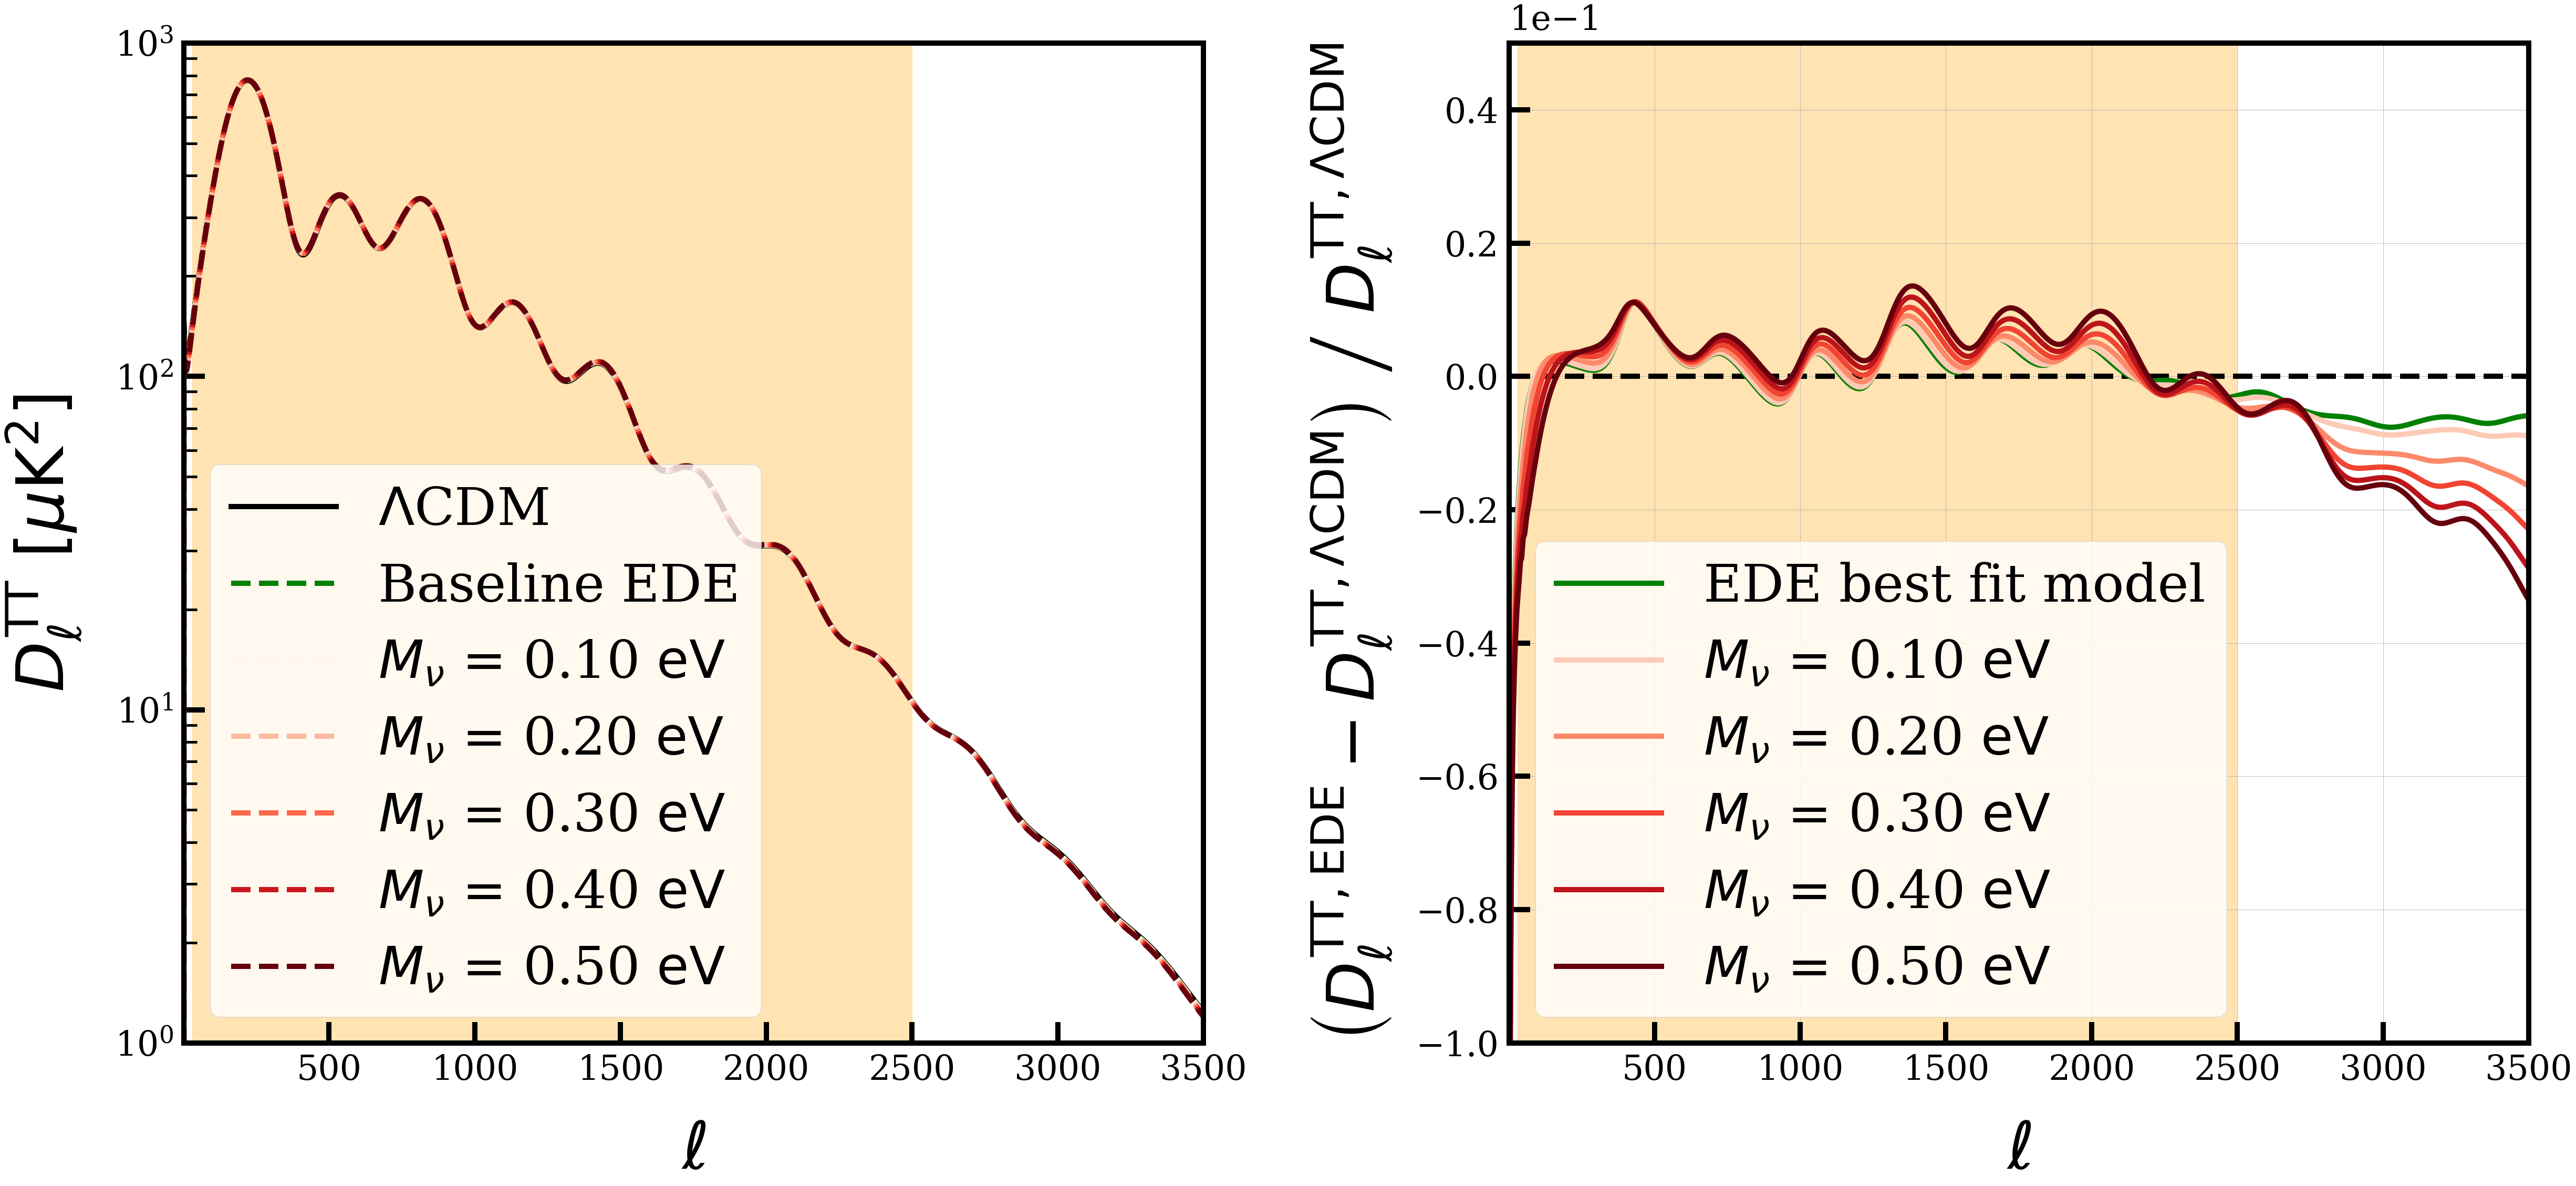

In [17]:
matplotlib.axis.YAxis.OFFSETTEXTPAD = 25
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(80,35))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)



ax1.plot(clell,DellTTLCDM,c='k',lw=10,label=r'$\Lambda$CDM')
ax1.plot(clell,DellTTEDE,color= 'g',ls='--',lw=10,label= 'Baseline EDE')


for i in range(0,5):
    var_color = plt.cm.Reds(1*i/(var_num-1))
    ax1.plot(clell,DellTTEDEmod[i],color= var_color,ls='--',lw=10,label= var_labels[i])
ax1.set_yscale('log')
ax1.set_xlim([2,3500])
ax1.set_ylim([1e0,1e3])
# ax1.set_xticks(pos)
# ax1.set_xticklabels(pos)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$D_\ell ^{\rm TT} ~ [\mu {\rm K}^2 ]$')
ax1.tick_params(pad=20)
ax1.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax1.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
ax1.legend()
ax1.axvspan(30, 2500, alpha=0.3, color='orange')





ax2.grid()
ax2.set_xlim([2,3500])
ax2.set_ylim([-0.1,0.05])
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.axhline(0,c='k',lw=10,ls='--')
ax2.plot(clell,(DellTTEDE - DellTTLCDM)/DellTTLCDM,c='g',lw=10., label='EDE best fit model')
for i in range(0,5):
    var_color = plt.cm.Reds(0.8*i/(var_num-1) + 0.2)
    ax2.plot(clell,(DellTTEDEmod[i] - DellTTLCDM)/DellTTLCDM,c=var_color,lw=10.,label= var_labels[i])
# ax2.set_xticks(pos)
# ax2.set_xticklabels(pos)
ax2.set_xlabel(r'$\ell$')
ax2.axvspan(30, 2500, alpha=0.3, color='orange')
ax2.set_ylabel(r'$ \left( D_\ell ^{\rm TT,EDE} - D_\ell ^{\rm TT,\Lambda CDM} \right) ~ \left/ ~ D_\ell ^{\rm TT,\Lambda CDM} \right.$',labelpad=40)#,fontsize=25)
ax2.tick_params(pad=20)
ax2.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax2.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
ax2.legend(loc='best')
plt.savefig('vary_m_nu_CMBTT_PT.pdf',bbox_inches='tight')

In [18]:
#Getting the matter power spectra for these runs
        
pkzLCDM0 = np.zeros(len(kk))
pkzm_nus0 = np.zeros((len(kk), 5))
pkzDiff0 = np.zeros((len(kk), 5))

for kindex in range(len(kk)):
#     pkzLCDM0[kindex] = LCDM.h()**3*LCDM.pk(kMpcLCDM[kindex],0)
    
    pkzLCDM0[kindex] = LCDM.h()**3*LCDM.pk_mm_real(cs)[kindex]
    
    for i, fEDE in enumerate(var_array):
        hnu = M[i].h()
        
        

        
#         pkzm_nus0[kindex][i] = hnu**3*M[i].pk(kMpcm_nus[kindex],0)
#         pkzDiff0[kindex][i] = (hnu**3*M[i].pk(kMpcm_nus[kindex],0)/pkzLCDM0[kindex]) - 1
        
        pkzm_nus0[kindex][i] = hnu**3*M[i].pk_mm_real(cs)[kindex]
        
        
        pkzDiff0[kindex][i] = (hnu**3*M[i].pk_mm_real(cs)[kindex]/pkzLCDM0[kindex]) - 1



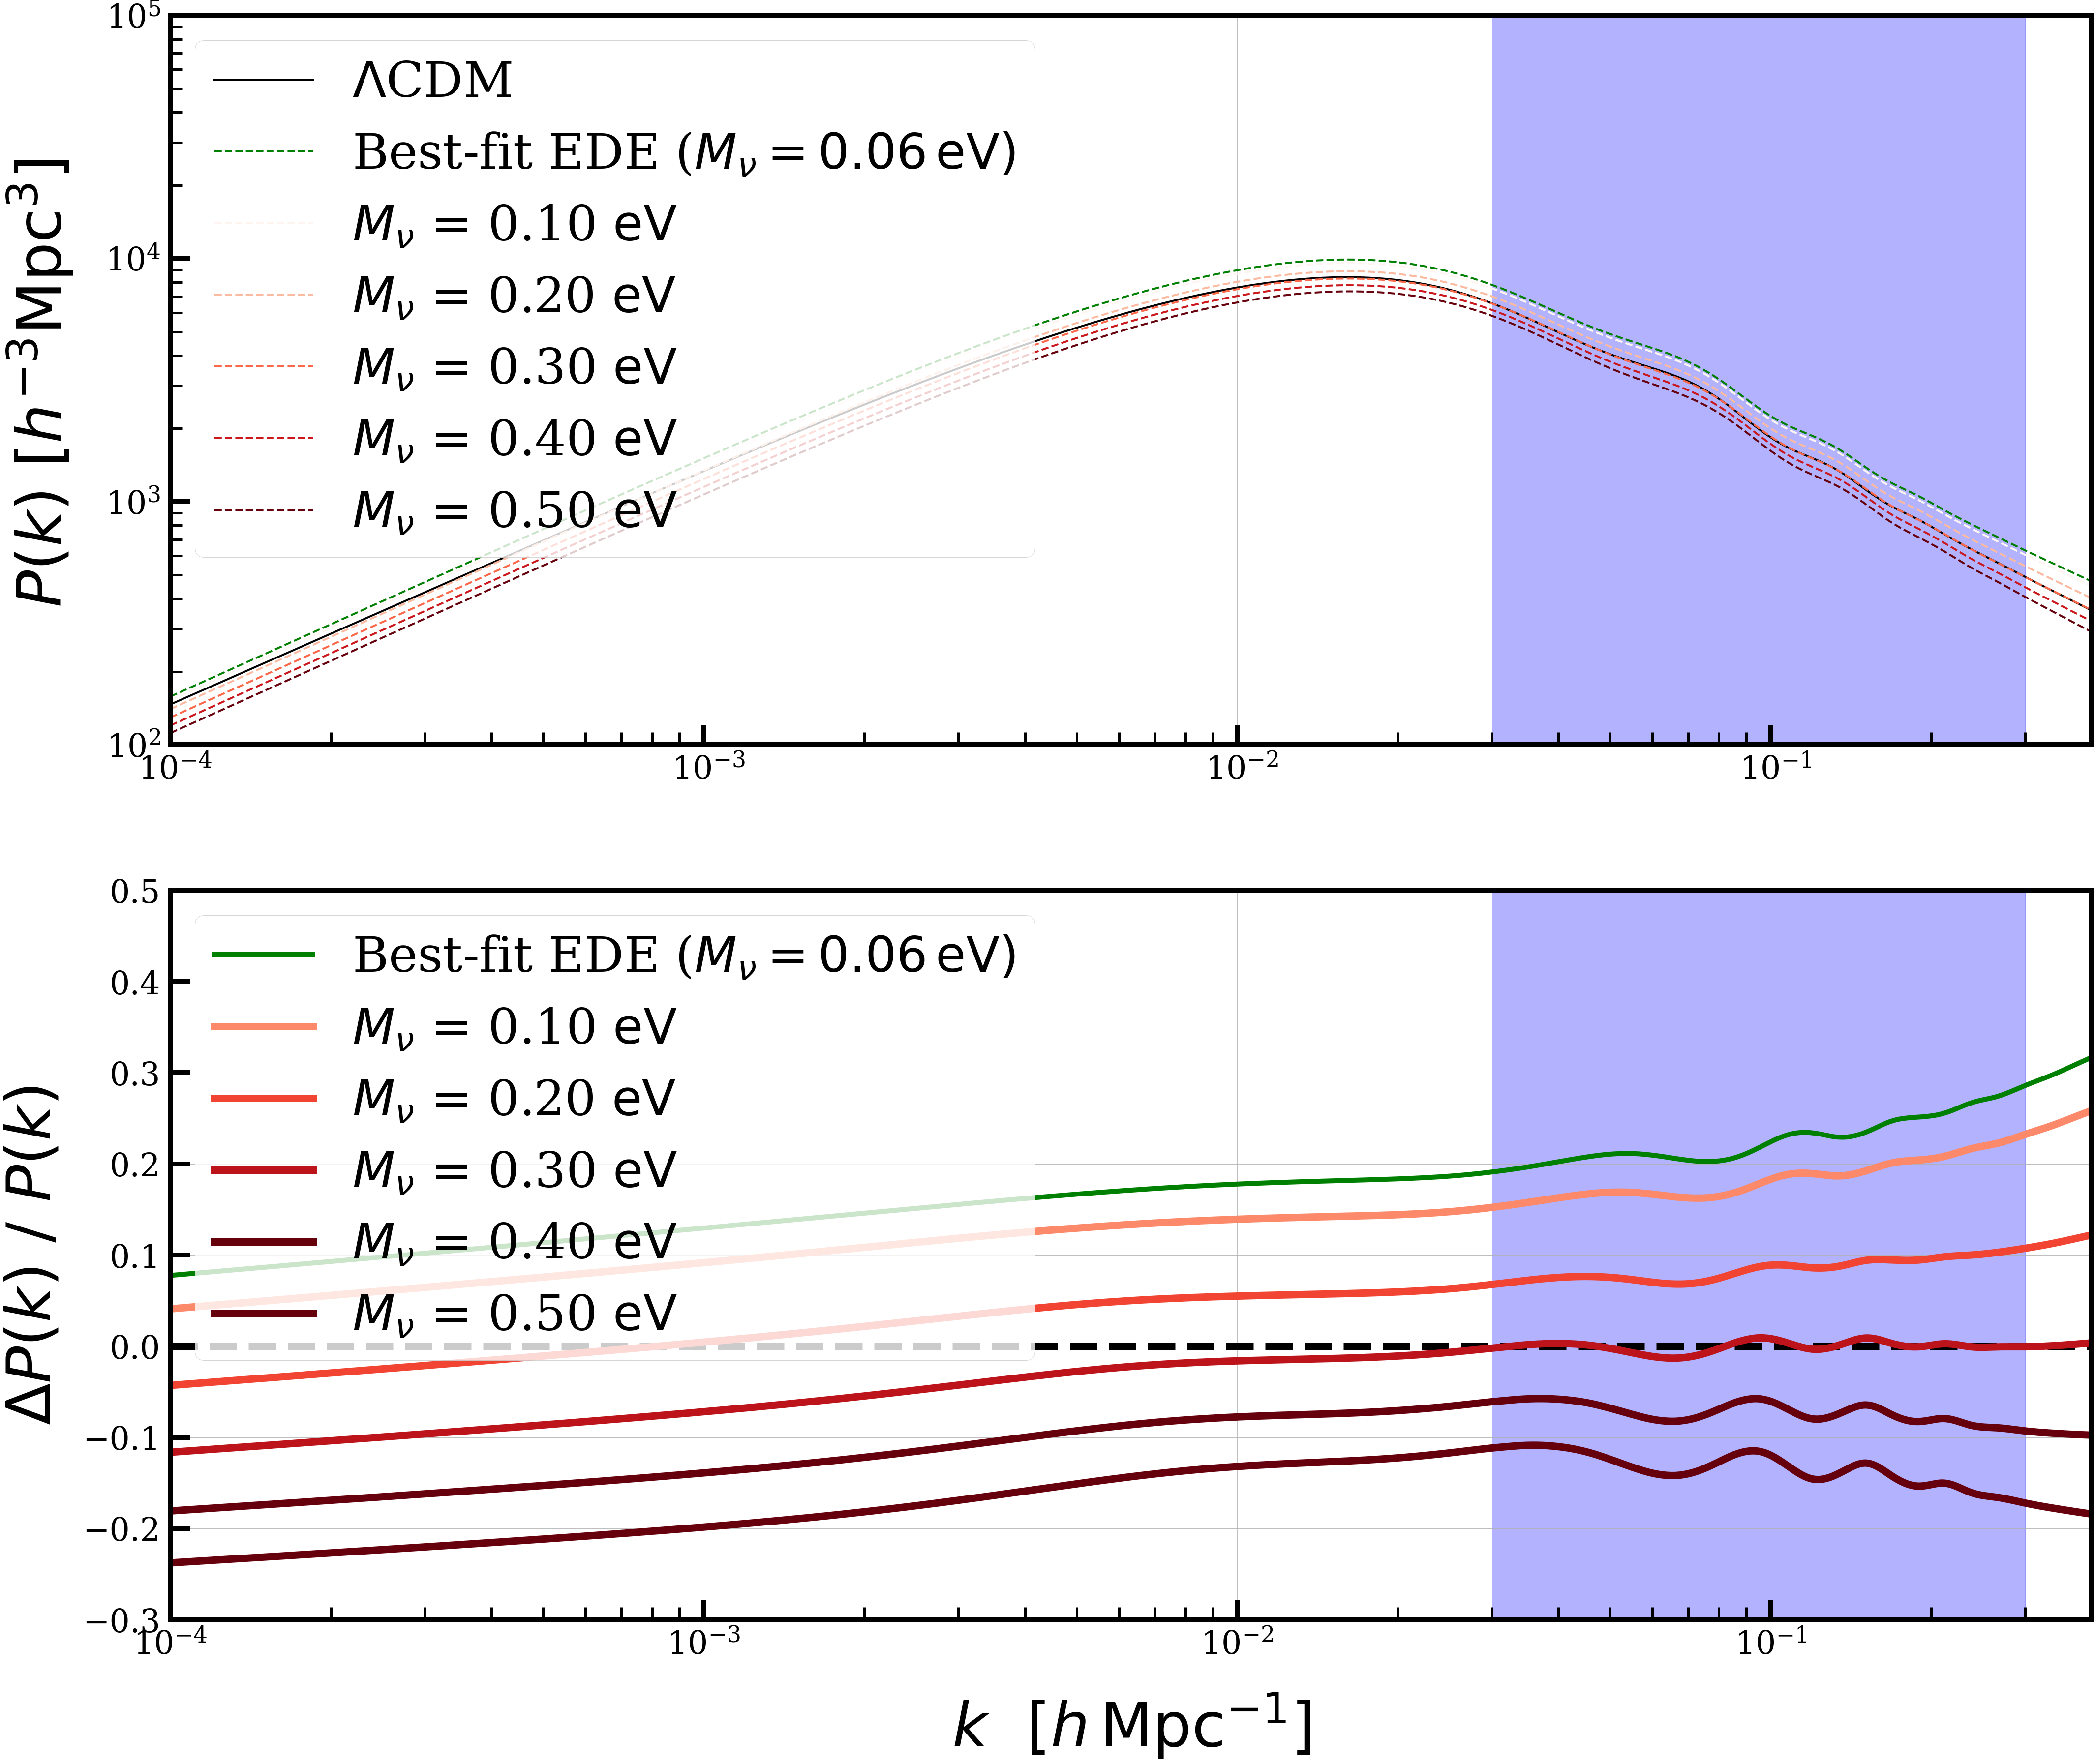

In [19]:
pos = [1.05e-4, 1e-3, 1e-2, 1e-1, 1]
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(70,60))

ax1.plot(kk,pkzLCDM0,c='k',lw=4,label=r'$\Lambda$CDM')
ax1.plot(kk,pkzEDE0,c='g',lw=4,ls='--',label=r'Best-fit EDE ($M_{\nu}=0.06\,{\rm eV})$')


for i in range(0,5):
    var_color = plt.cm.Reds(1*i/(var_num-1))
    # ax1.plot(kk,pkzm_nus0[:,i],c=var_color,lw=4,ls='--',label=var_labels[i] + r', $\sigma_8$=' + '%.3f' %sig_8s[i])
    ax1.plot(kk,pkzm_nus0[:,i],c=var_color,lw=4,ls='--',label=var_labels[i])


ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(frameon=True, loc = 'best');
ax1.grid()
# ax1.set_xlabel(r'$k$  $[h\, {\rm Mpc}^{-1}]$')
ax1.tick_params(pad=20)
ax1.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax1.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='y', length=25, width=5, direction='in')

ax1.set_ylabel(r'$ P(k) ~ [ h^{-3} {\rm Mpc}^3 ] $ ')
# ax1.set_ylabel(r'$ P(k)$ ')

ax1.set_ylim([1e2,1e5])
ax1.set_xlim([kk[0],kk[-1]])



ax1.axvspan(0.03, 0.3, alpha=0.3, color='blue')


# Create offset transform by 5 points in x direction
dx = 10/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax1.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    

ax2.grid()
ax2.set_xlim([kk[0],kk[-1]])
ax2.set_ylim([-0.3,0.5])
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.axhline(0,c='k',lw=15,ls='--')
ax2.plot(kk,pkzDiffEDE0,c='g',lw=10., label= r'Best-fit EDE ($M_{\nu}=0.06\,{\rm eV})$')
for i in range(0,5):
    var_color = plt.cm.Reds(0.8*i/(var_num-1) + 0.4)
    # ax2.plot(kk,pkzDiff0[:,i],c=var_color,lw=15., label= var_labels[i] + r', $\sigma_8=$' '%.3f' %sig_8s[i])
    ax2.plot(kk,pkzDiff0[:,i],c=var_color,lw=15., label= var_labels[i])


ax2.set_xlabel(r'$k$  $[h\, {\rm Mpc}^{-1}]$')
ax2.set_xscale('log')
# ax2.set_ylabel(r'$ \left( P(k)_{EDE} - P(k)_{\Lambda CDM} \right) ~ \left/ ~ P(k)_{\Lambda CDM} \right.$',labelpad=40)#,fontsize=25)
ax2.set_ylabel(r'$\Delta P(k) ~ / ~ P(k)$',labelpad=40) #,fontsize=25)

ax2.tick_params(pad=20)
ax2.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax2.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
ax2.legend(loc='best')
ax2.axvspan(0.03, 0.3, alpha=0.3, color='blue')

fig.savefig('varym_nu_MPS_PT.pdf',bbox_inches='tight')

#### 

## Instead compensate with changing w_cdm instead to keep Omega_m constant and see if this changes required $m_\nu$

In [20]:
#Exactly the same as the best fit EDE model but now varying m_ncdm so need to remove this parameter and the 
#other parameters affected by the above constraint 
#'100*theta_s': 1.0415117075976437,
common_settings = {
         'h': 0.7182856, #using h from the baseline model 
         'log10z_c': 3.562,
         'thetai_scf': 2.83,
         'A_s': 2.215e-09,
         'n_s': 0.9889,
         'omega_b': omega_b_baseline,
         'tau_reio': 0.072,
         'non linear':'HMCODE',
         'N_ncdm':1,
         'N_ur':2.0328, 
         'Omega_Lambda':0.0, #set to zero as included in potential function! 
         'Omega_fld':0, 
         'Omega_scf':-1, 
         'n_scf':3, #n-value for potential 
         'CC_scf':1, 
         'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
         'scf_tuning_index':3, 
         'attractor_ic_scf':'no', 
         'output':'tCl pCl lCl mPk', 
         'lensing':'yes', 
         'l_max_scalars':3508, 
         'P_k_max_h/Mpc':30,
         'z_max_pk':2., 
         'fEDE':0.122}

##############################################
#
# loop over varying parameter values keeping 100theta_s constant! 
#
M_cdm = {}
#

#trade off against omega-cdm 
for i, m_ncdm in enumerate(var_array):
    
    omega_nu_baseline = 0.06/93.14
    
    omega_nu = m_ncdm/93.14
    
    omega_nu_diff = omega_nu-omega_nu_baseline #the differnce that must be accounted for to keep the budget equation h^2 = \Sigma w_i 
    
    omega_cdm = omega_cdm_baseline-omega_nu_diff #compensate by decreasing omega_cdm -- kpes Omega_m constant 
#     h = np.sqrt((h_baseline)**2 + omega_nu_diff)
    
    M_cdm[i] = Class()
    M_cdm[i].set(common_settings)
#     M[i].set({'omega_cdm': omega_cdm})
    
    
    
    #for computing non-linear MPS using 1-loop PT and IR resummation 
    M_cdm[i].set({'non linear':'PT',
        'IR resummation':'Yes',
        'Bias tracers':'Yes',
        'cb':'Yes',
        'RSD':'Yes',
        'AP':'Yes',
        'Omfid':'0.31'
           })

    
    M_cdm[i].set({'m_ncdm':m_ncdm, 
             'omega_cdm': omega_cdm})
    M_cdm[i].compute()
    hnu = M_cdm[i].h()
    print(M_cdm[i].h())
    
    kMpcm_nus = kk*hnu # k in units of Mpc for modified EDE runs
        
    ## Initialize the convenience functions pk_mm_real, pk_gg_l0 etc. 
    M_cdm[i].initialize_output(kMpcm_nus, 0, len(kMpcm_nus))

0.7182856
0.7182856
0.7182856
0.7182856
0.7182856


In [21]:
#Getting the matter power spectra for these runs
        
pkzLCDM0 = np.zeros(len(kk))
pkzm_nus0 = np.zeros((len(kk), 5))
pkzDiff0 = np.zeros((len(kk), 5))

for kindex in range(len(kk)):
#     pkzLCDM0[kindex] = LCDM.h()**3*LCDM.pk(kMpcLCDM[kindex],0)
    
    pkzLCDM0[kindex] = LCDM.h()**3*LCDM.pk_mm_real(cs)[kindex]
    
    for i, fEDE in enumerate(var_array):
        hnu = M[i].h()
        
        

        
#         pkzm_nus0[kindex][i] = hnu**3*M[i].pk(kMpcm_nus[kindex],0)
#         pkzDiff0[kindex][i] = (hnu**3*M[i].pk(kMpcm_nus[kindex],0)/pkzLCDM0[kindex]) - 1
        
        pkzm_nus0[kindex][i] = hnu**3*M_cdm[i].pk_mm_real(cs)[kindex]
        
        
        pkzDiff0[kindex][i] = (hnu**3*M_cdm[i].pk_mm_real(cs)[kindex]/pkzLCDM0[kindex]) - 1

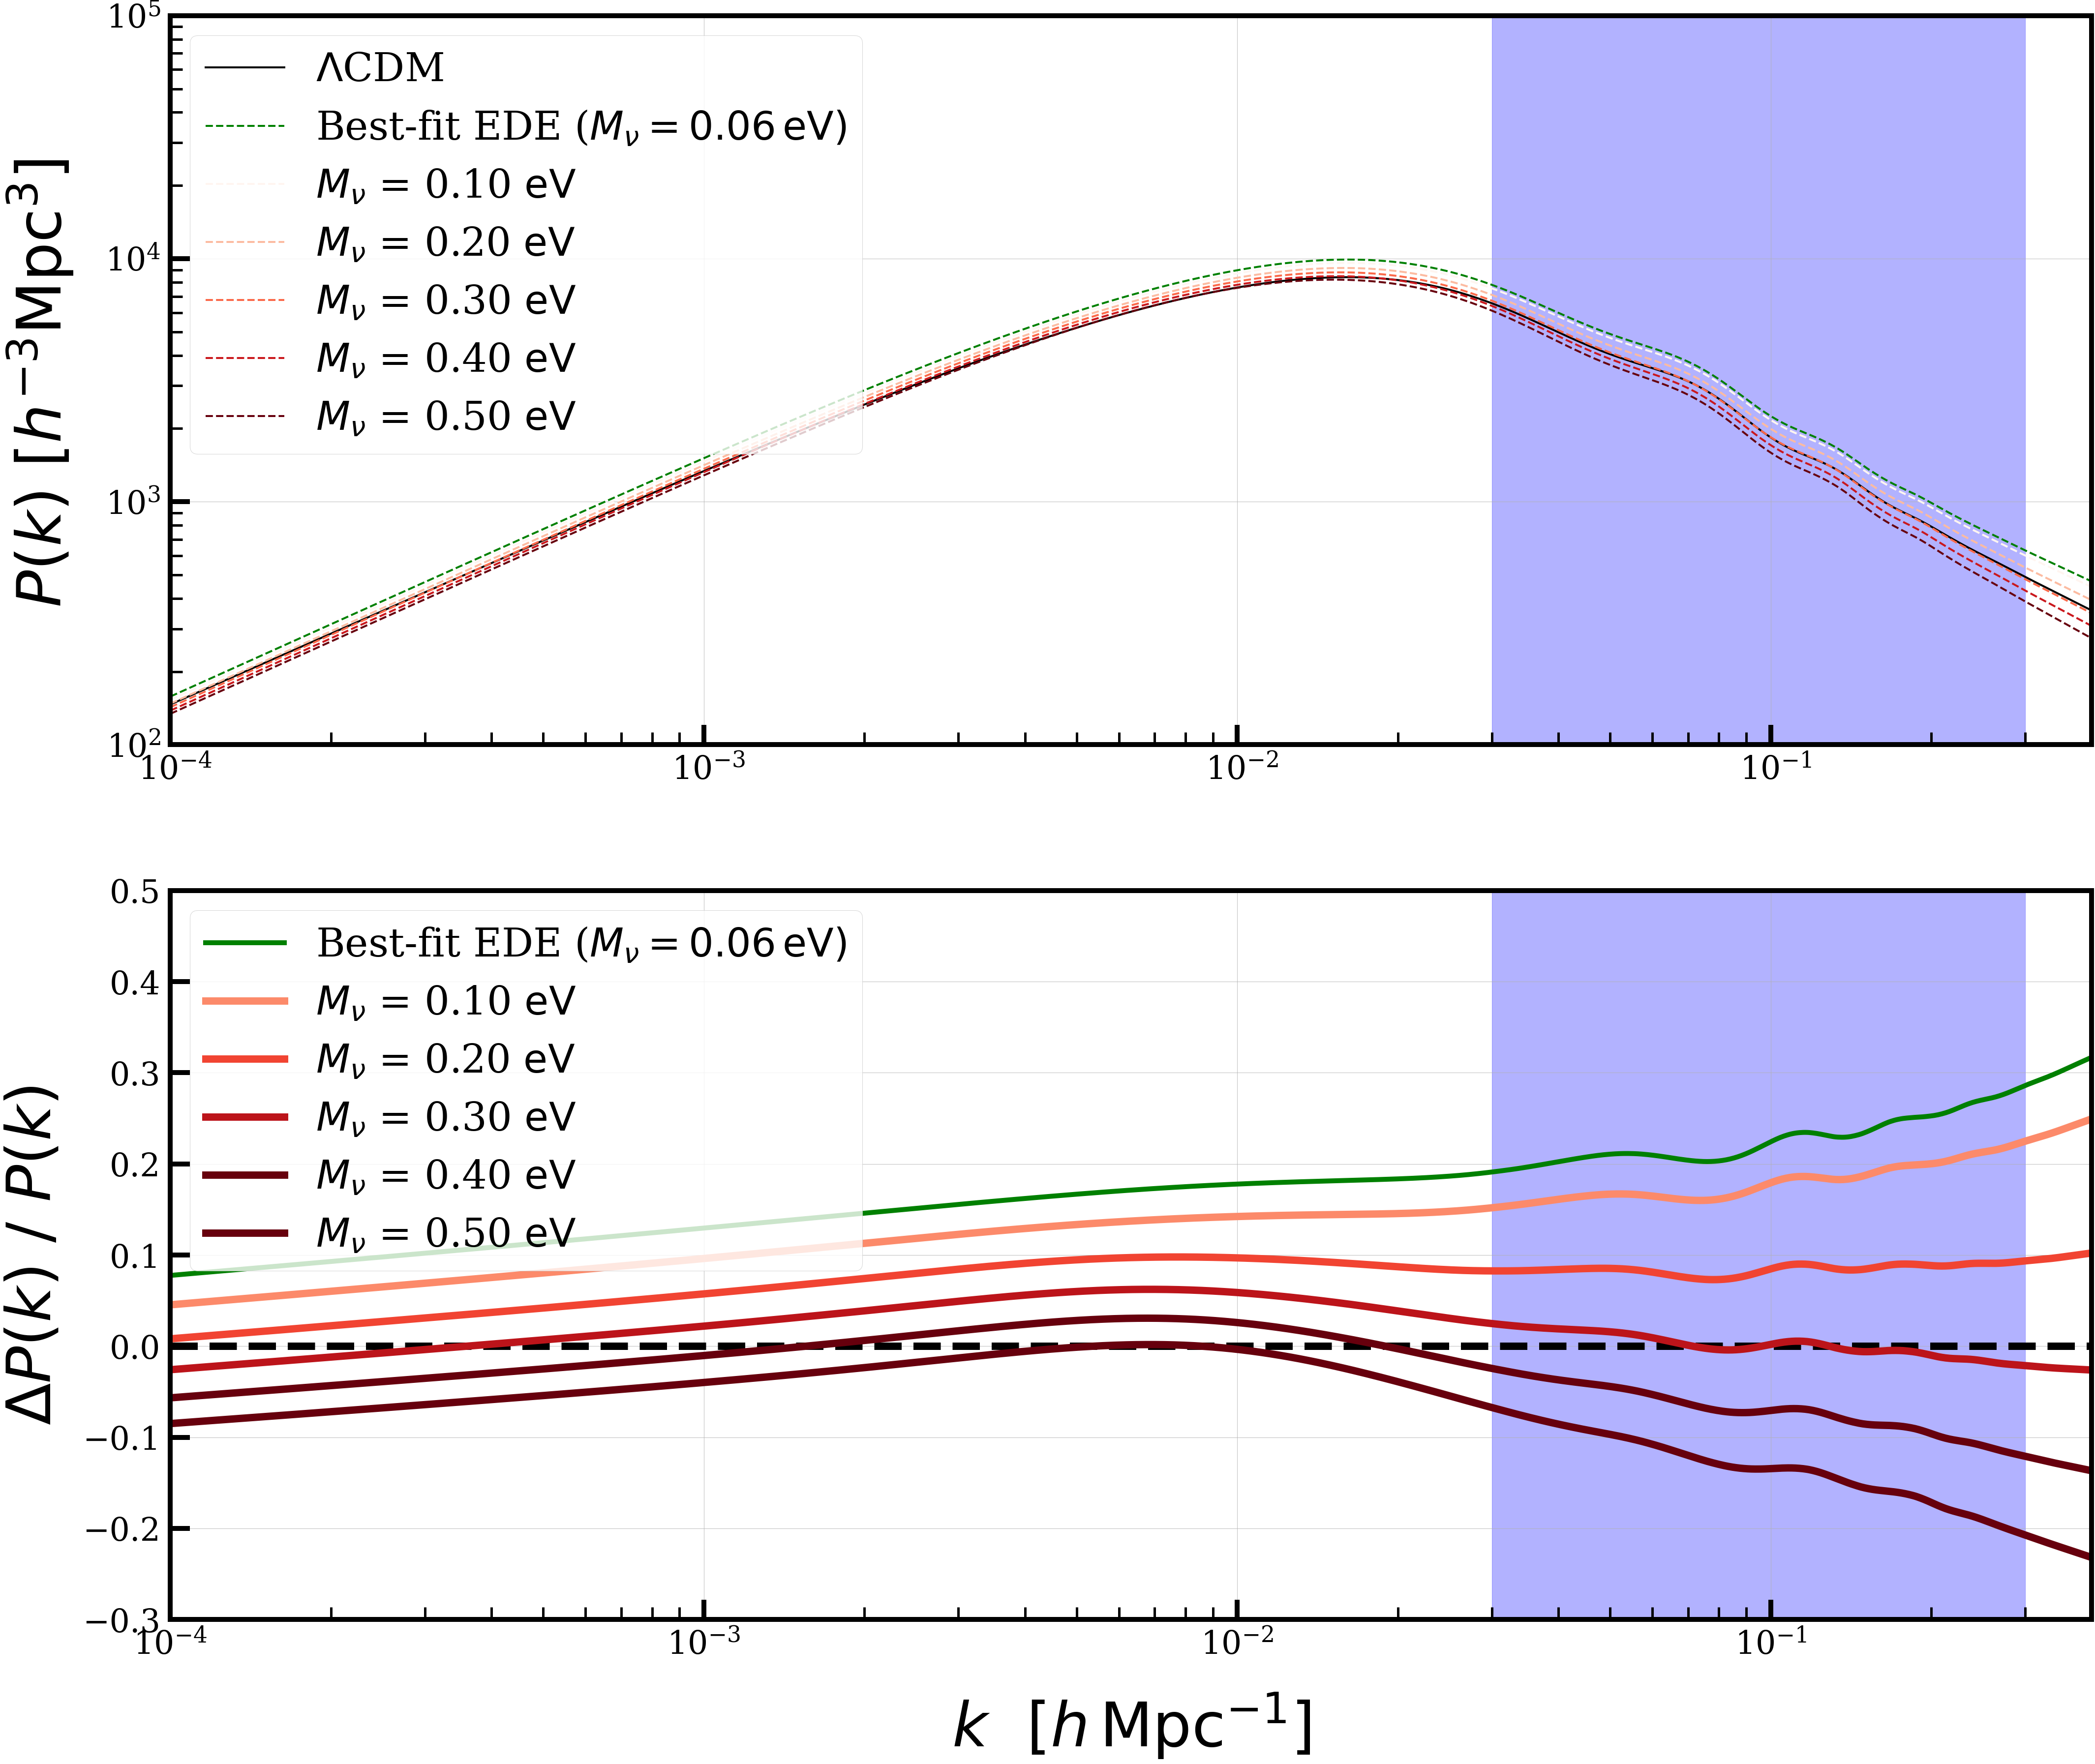

In [22]:
pos = [1.05e-4, 1e-3, 1e-2, 1e-1, 1]
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(70,60))
matplotlib.rcParams['legend.fontsize'] = 80
ax1.plot(kk,pkzLCDM0,c='k',lw=4,label=r'$\Lambda$CDM')
ax1.plot(kk,pkzEDE0,c='g',lw=4,ls='--',label=r'Best-fit EDE ($M_{\nu}=0.06\,{\rm eV})$')


for i in range(0,5):
    var_color = plt.cm.Reds(1*i/(var_num-1))
    # ax1.plot(kk,pkzm_nus0[:,i],c=var_color,lw=4,ls='--',label=var_labels[i] + r', $\sigma_8$=' + '%.3f' %sig_8s[i])
    ax1.plot(kk,pkzm_nus0[:,i],c=var_color,lw=4,ls='--',label=var_labels[i])


ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(frameon=True, loc = 'best');
ax1.grid()
# ax1.set_xlabel(r'$k$  $[h\, {\rm Mpc}^{-1}]$')
ax1.tick_params(pad=20)
ax1.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax1.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='y', length=25, width=5, direction='in')

ax1.set_ylabel(r'$ P(k) ~ [ h^{-3} {\rm Mpc}^3 ] $ ')
# ax1.set_ylabel(r'$ P(k)$ ')

ax1.set_ylim([1e2,1e5])
ax1.set_xlim([kk[0],kk[-1]])



ax1.axvspan(0.03, 0.3, alpha=0.3, color='blue')


# Create offset transform by 5 points in x direction
dx = 10/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax1.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    

ax2.grid()
ax2.set_xlim([kk[0],kk[-1]])
ax2.set_ylim([-0.3,0.5])
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.axhline(0,c='k',lw=15,ls='--')
ax2.plot(kk,pkzDiffEDE0,c='g',lw=10., label= r'Best-fit EDE ($M_{\nu}=0.06\,{\rm eV})$')
for i in range(0,5):
    var_color = plt.cm.Reds(0.8*i/(var_num-1) + 0.4)
    # ax2.plot(kk,pkzDiff0[:,i],c=var_color,lw=15., label= var_labels[i] + r', $\sigma_8=$' '%.3f' %sig_8s[i])
    ax2.plot(kk,pkzDiff0[:,i],c=var_color,lw=15., label= var_labels[i])


ax2.set_xlabel(r'$k$  $[h\, {\rm Mpc}^{-1}]$')
ax2.set_xscale('log')
# ax2.set_ylabel(r'$ \left( P(k)_{EDE} - P(k)_{\Lambda CDM} \right) ~ \left/ ~ P(k)_{\Lambda CDM} \right.$',labelpad=40)#,fontsize=25)
ax2.set_ylabel(r'$\Delta P(k) ~ / ~ P(k)$',labelpad=40) #,fontsize=25)

ax2.tick_params(pad=20)
ax2.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax2.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
ax2.legend(loc='best')
ax2.axvspan(0.03, 0.3, alpha=0.3, color='blue')

fig.savefig('varym_nu_MPS_PT_cdm_compensate.pdf',bbox_inches='tight')

### Inference is roughly the same ~0.3eV required